In [6]:
import torch
import json
from models.clap import HANCECLAP
import matplotlib.pyplot as plt

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


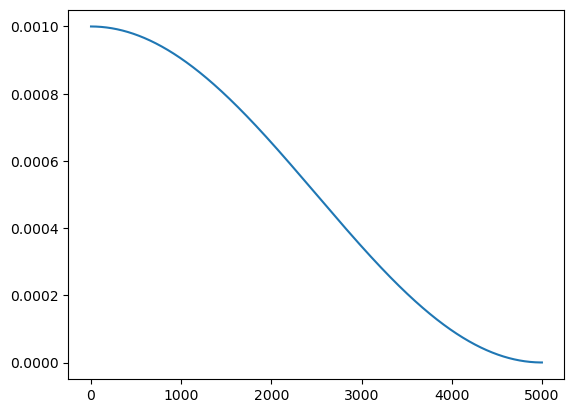

In [25]:
with open ('model_definitions/clap.json', 'r') as f:
        settings = json.load (f)

model = HANCECLAP(settings=settings, device='cpu', print_shapes=False)

optim = torch.optim.AdamW(model.parameters(), lr=settings['learning_rate'], weight_decay=0.1)
data_samples = 100
n_training_steps = settings['num_of_epochs'] * data_samples
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=n_training_steps, eta_min=1e-7)

# Plot scheduler
learning_rates = []
for epoch in range(settings['num_of_epochs']):
    for i in range(data_samples):
        learning_rates.append(scheduler.get_lr())
        scheduler.step()

plt.plot(learning_rates)

c:\Users\olive\miniconda3\envs\hance\lib\site-packages\torch\optim\lr_scheduler.py:261: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
c:\Users\olive\miniconda3\envs\hance\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


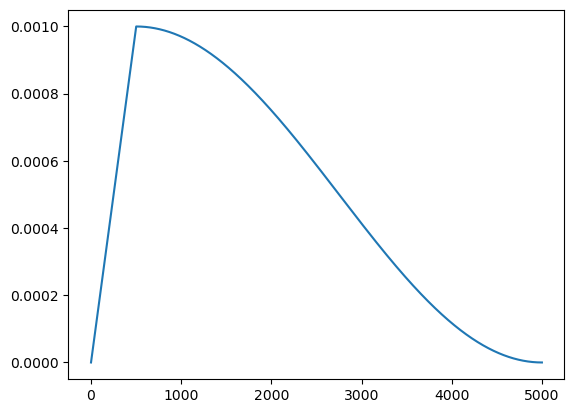

In [26]:
import numpy as np
from transformers import get_cosine_schedule_with_warmup
n_warmup_steps = np.floor(n_training_steps * 0.1)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optim, T_max=n_training_steps, eta_min=1e-7)
scheduler = get_cosine_schedule_with_warmup(optimizer=optim, num_warmup_steps=n_warmup_steps, num_training_steps=n_training_steps)

# Plot scheduler
learning_rates = []
for epoch in range(settings['num_of_epochs']):
    for i in range(data_samples):
        learning_rates.append(scheduler.get_lr())
        scheduler.step()

plt.plot(learning_rates)